# 卷积神经网络CNN
convolutional neural network 
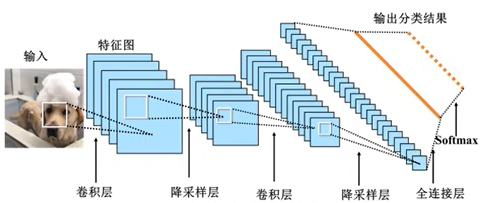


##  全连接网络的局限性
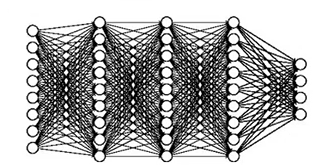
参数增多会导致：  
计算速度减慢  
过拟合

## 卷积神经网络结构
输入层  将每个像素代表的一个特征节点输入到网络中  
卷积层   卷积运算的主要目的是使原信号特征增强，并降低噪音  
降采样层 降低网络训练参数及模型的过拟合程度。  
全连接层  对生成的特征进行加权  
Softmax层  获得当前样例属于不同类别的概率

### 卷积    
卷积核 权值矩阵 权值共享 ： 卷积核在图像上滑动过程中保持不变  
特征图 卷积操作后的图像    
局部连接 每个输出特性不用查看每个输入特征，而只需查看部分输入特征  
卷积层 卷积运算的主要目的使原信号特征增强，并降低噪音

#####  0填充
用额外的"假"像素通常值为0填充边缘。在滑动时的卷积核可以允许原始边缘像素位于卷积核的中心，同时延伸到边缘之外的假像素，从而产生与输入相同大小的输出。 

##### 多通道卷积
每个卷积核都会将生成为另一幅特征映射图，即： 一个卷积核提取一种特征  
为了使特征提取更充分，可以添加多个卷积核   
加偏置


### 池化
均值池化  

最值池化
（降采样）
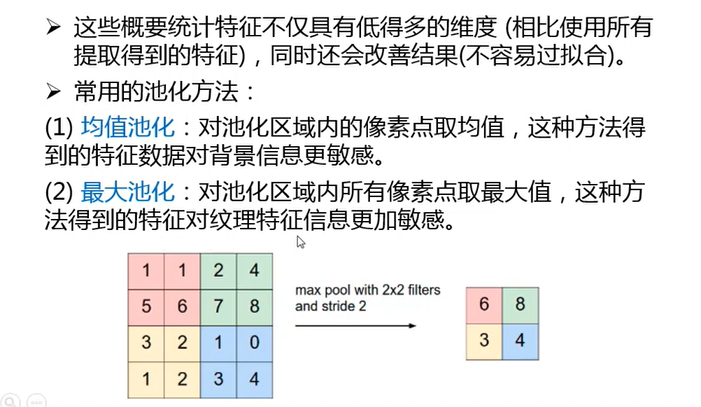

###### 步长

### 卷积函数
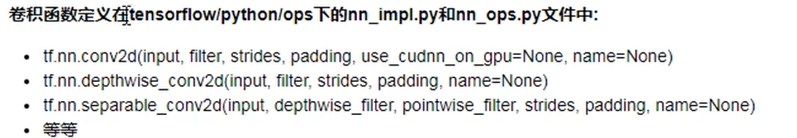

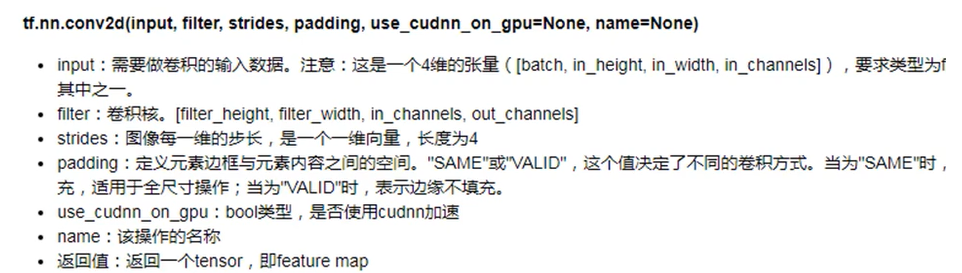


In [2]:
import tensorflow as tf
import numpy as np

input_data = tf.Variable(np.random.rand(10,9,9,4),dtype=np.float32)
filter_data = tf.Variable(np.random.rand(3,3,4,2),dtype=np.float32)
y = tf.nn.conv2d(input_data,filter_data,strides=[1,1,1,1],padding='VALID')
print(input_data)
print(y)

<tf.Variable 'Variable_2:0' shape=(10, 9, 9, 4) dtype=float32_ref>
Tensor("Conv2D_1:0", shape=(10, 7, 7, 2), dtype=float32)


### 池化函数
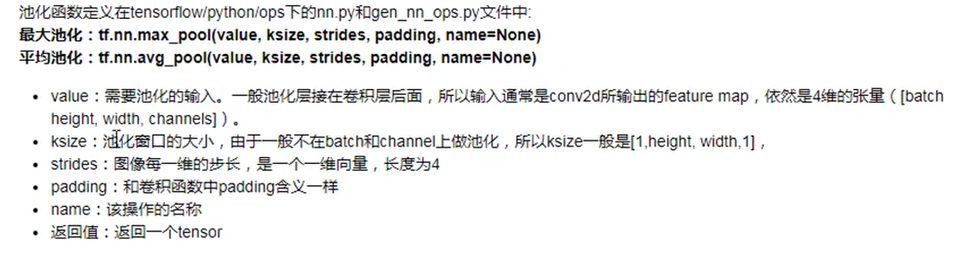

In [3]:
import tensorflow as tf
import numpy as np

input_data = tf.Variable(np.random.rand(10,9,9,4),dtype=np.float32)
filter_data = tf.Variable(np.random.rand(3,3,4,2),dtype=np.float32)

y = tf.nn.conv2d(input_data,filter_data,strides=[1,1,1,1],padding='SAME')
# 最大池化
output=tf.nn.max_pool(value=y,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
# 平均池化
# output= tf.nn.avg_pool(value=y,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


print('conv:',y)
print('pool_padding_valid',output)

conv: Tensor("Conv2D_2:0", shape=(10, 9, 9, 2), dtype=float32)
pool_padding_valid Tensor("MaxPool:0", shape=(10, 5, 5, 2), dtype=float32)


## CIFAR-10 数据集
https://www.cs.toronoto.edu/~kriz/cifar.html

三通道RGB图像 MNIST是灰度图  
CIFAR—10中图片是32*32    MNIST的28*28  
物体比例和特征不尽相同，噪声大， 识别难度较MNISt高



In [4]:
import os 
import numpy as np
import pickle as p


# 读取数据集的一个批次的样本
def load_CIFAR_batch(filename):
    with open(filename,'rb') as f:
        data_dict = p.load(f,encoding='bytes')
        images=data_dict[b'data']
        labels = data_dict[b'labels']
        
        images = images.reshape(10000,3,32,32)
        images = images.transpose(0,2,3,1)
        labels = np.array(labels)
        return images,labels

    
    
    # 数据集的完整读取
def load_CIFAR_data(data_dir):
    
    images_train=[]
    labels_train = []
    for i in range(5):
        f= os.path.join(data_dir,'data_batch_%d'%(i+1))
        print('loading',f)
        image_batch,label_batch=load_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrian=np.concatenate(images_train)
        Ytrain = np.concatenate(labels_train)
        del image_batch,label_batch
        
    Xtest,Ytest = load_CIFAR_batch(os.path.join(data_dir,'test_batch'))
    print('finished loadding CIFAR-10 data')
    return Xtrian,Ytrain,Xtest,Ytest

data_dir = 'E:\FIle\dppdf\data\cifar-10-batches-py'
Xtrain,Ytrain,Xtest,Ytest=load_CIFAR_data(data_dir)
  



loading E:\FIle\dppdf\data\cifar-10-batches-py\data_batch_1
loading E:\FIle\dppdf\data\cifar-10-batches-py\data_batch_2
loading E:\FIle\dppdf\data\cifar-10-batches-py\data_batch_3
loading E:\FIle\dppdf\data\cifar-10-batches-py\data_batch_4
loading E:\FIle\dppdf\data\cifar-10-batches-py\data_batch_5
finished loadding CIFAR-10 data


In [5]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


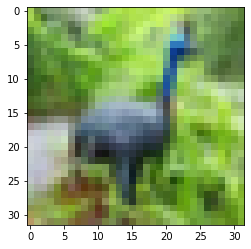

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Xtrain[6])

In [7]:
print(Ytrain[6])  # 查看对应label

2


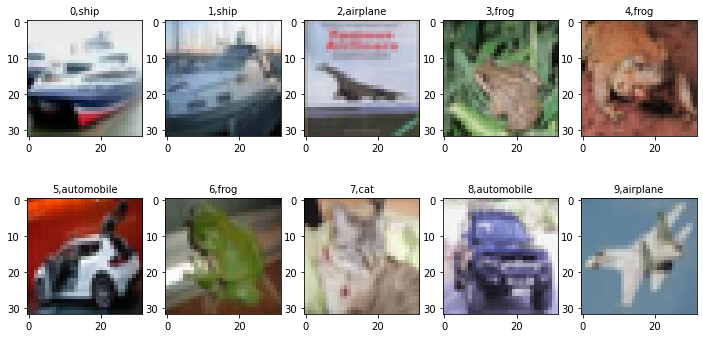

In [8]:
import matplotlib.pyplot as plt
# 定义标签字典， 每一个数字所代表的图像类别的名称
label_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',
             8:'ship',9:'truck'}
# 定义显示图像数据及其对应标签的函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num>10:
        num=10
    for i in range(0,num):
        ax = plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title = str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        
        idx+=1
    plt.show()
# 显示图像数据及其对应标签
plot_images_labels_prediction(Xtest,Ytest,[],1,10)
        



In [9]:
# 查看图像数据信息
# 显示第一个图的第一个像素点 三通道的
Xtrain[0][0][0]

array([59, 62, 63], dtype=uint8)

In [10]:
# 将图像进行数字标准化
Xtrain_normalize= Xtrain.astype('float32')/255.0
Xtest_normalize= Xtest.astype('float32')/255.0

In [11]:
# 查看预处理后图像数据信息
Xtrain_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [12]:
# 查看标签数据
Ytrain[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])

## 独热编码
能够处理非连续型数值特征  
在一定程度上也扩充了特征， 比如性别本身是一个特征， 经过编码后变成了男或女俩个特征

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse= False)

yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
Ytrain_reshape=Ytrain.reshape(-1,1)
Ytrain_onehot=encoder.transform(Ytrain_reshape)
Ytest_reshape=Ytest.reshape(-1,1)
Ytest_onehot=encoder.transform(Ytest_reshape)


In [14]:
Ytrain_onehot.shape

(50000, 10)

In [15]:
Ytrain[:5]

array([6, 9, 9, 4, 1])

In [16]:
Ytrain_onehot[:5]   # 前五项使用独热编码

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# 建立CIFAR-10图像分类模型
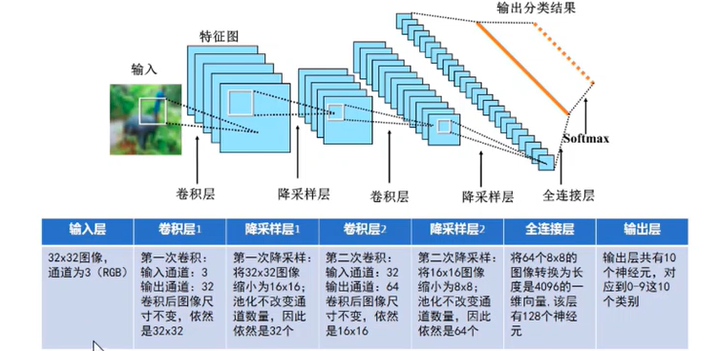

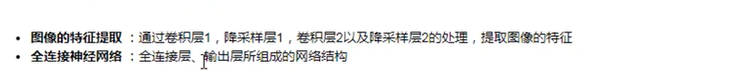

In [17]:
import tensorflow as tf
tf.reset_default_graph()

# 定义共享函数

In [18]:
#  定义权值
# 构建模型是创建一个变量，在训练时，变量不断更新， 
# 使用truncated_normal 截断的正态分布生成标准差为0.1的随机数来初始化权值
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1),name='W')
#   定义偏置值 初始化为0.1
def bias(shape):
    return tf.Variable(tf.constant(0.1,shape=shape),name='b')
# 定义卷积操作， 步长为1， padding为SAME  使用全尺寸操作
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
# 定义池化操作 步长为2， 即原尺寸的长宽各除以2
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [19]:
# 输入层
# 32*32 图像， 通道为3RGB
with tf.name_scope('input_layer'):
    x = tf.placeholder('float',shape=[None,32,32,3],name='x')
# 第一个卷积层
# 输入通道为3 输出通道为32 卷积后图像尺寸不变， 依旧是32*32
with tf.name_scope('conv_1'):
    W1=weight([3,3,3,32])       # 卷积核宽 高， 输入通道数，输出通道数
    b1 = bias([32])   # 
    conv_1=conv2d(x,W1)+b1
    conv_1=tf.nn.relu(conv_1)
# 第一个池化层 
# 将图像缩小为16*16， 池化不改变通道数量，依旧是32个
with tf.name_scope('pool_1'):
    pool_1=max_pool_2x2(conv_1)

#第二个卷积层
# 输入通道 32  输出通道64 卷积后图像尺寸不变 16*16
with tf.name_scope('conv_2'):
    W2=weight([3,3,32,64])       # 卷积核宽 高， 输入通道数，输出通道数
    b2 = bias([64])   # 
    conv_2=conv2d(pool_1,W2)+b2
    conv_2=tf.nn.relu(conv_2)

# 第二个池化层
# 将16*16的图像缩小为8*8 池化不改变通道数量 依旧是64个
with tf.name_scope('pool_2'):
    pool_2=max_pool_2x2(conv_2)
# 全连接层
# 将第二个池化层的64个8*8图像转化为一维的向量， 长度是64*8*8=4096
# 128 个神经元
with tf.name_scope("fc"):
    W3= weight([4096,128])
    b3 = bias([128])
    flat = tf.reshape(pool_2,[-1,4096])
    h = tf.nn.relu(tf.matmul(flat,W3)+b3)
    h_dropout = tf.nn.dropout(h,keep_prob=0.8)
# 输出层
# 输出层共有10个神经元，对应到0-9这10个类别
with tf.name_scope("output_layer"):
    W4 = weight([128,10])
    b4 = bias([10])
    pred = tf.nn.softmax(tf.matmul(h_dropout,W4)+64)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
# 构建模型
with tf.name_scope('optimizer'):
    y= tf.placeholder('float',shape= [None,10],name ='label')
    
    loss_function=tf.reduce_mean(        
    tf.nn.softmax_cross_entropy_with_logits
    (logits=pred,labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
# 定义准确率
with tf.name_scope('evaluation'):
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))

In [22]:
import os
from time import time
train_epochs= 25

batch_size=50

total_batch=int(len(Xtrain)/batch_size)

epoch_list=[];accuracy_list=[];loss_list=[];

epoch = tf.Variable(0,name='epoch',trainable=False)

startTime = time()

sess=tf.Session()

init = tf.global_variables_initializer()

sess.run(init)


In [23]:
# 断点培训
# 设置检查点 存储目录
ckpt_dir = "CIFAR10_log/"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
#生成saver
saver = tf.train.Saver(max_to_keep=1)
# 如果有检查点文件， 读取最新的检查点文件，恢复各种变量值。
ckpt= tf.train.latest_checkpoint(ckpt_dir)

if ckpt!=None:
    saver.restore(sess,ckpt)  # 加载所有的参数
    # 从这里开始就可以直接使用模型进行预测， 或者接着继续训练
else:
    print("Training from scratch")

# 获取续训参数
start = sess.run(epoch)
print("Training starts from {}  epoch.".format(start+1))



Training from scratch
Training starts from 1  epoch.


In [30]:
# 迭代训练
def get_train_batch(number,batch_size):
    return Xtrain_normalize[number*batch_size:(number+1)*batch_size],\
            Ytrain_onehot[number*batch_size:(number+1)*batch_size]
    
for ep in range(start,train_epochs):
    for i in range(total_batch):
        batch_x,batch_y=get_train_batch(i,batch_size)
        sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
        if i%100 == 0:
            print("Step{}".format(i),'finished')
    loss,acc=sess.run([loss_function,accuracy],feed_dict={x:batch_x,y:batch_y})
    epoch_list.append(ep+1)
    loss_list.append(loss);
    accuracy_list.append(acc)
   
    print("Train epoch:",'%02d'%(sess.run(epoch)+1),\
         "loss=","{:.6f}".format(loss),"Accuracy=",acc)
    
    # 保存检查点
    saver.save(sess,ckpt_dir+"CIFAR10_cnn_model.ckpt",global_step=ep+1)
    sess.run(epoch.assign(ep+1))
    
duration = time()-startTime
print("Train finished takes:",duration)

Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 07 loss= 2.041792 Accuracy= 0.4
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 02 loss= 2.018804 Accuracy= 0.44
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 03 loss= 2.002162 Accuracy= 0.5
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 04 loss= 2.046950 Accuracy= 0.38
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 fini

AttributeError: module 'matplotlib.pyplot' has no attribute 'append'

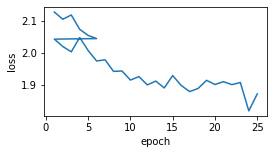

In [32]:
# 可视化损失值
%matplotlib inline 
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.append(['loss'],loc='upper right')


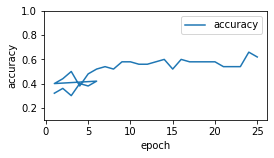

In [33]:
# 可视化准确率
plt.plot(epoch_list,accuracy_list,label="accuracy")
fig=plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.1,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [34]:
test_total_batch = int(len(Xtest_normalize)/batch_size)
test_acc_sum=0.0
for i in range(test_total_batch):
    test_image_batch=Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch=Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc=sess.run(accuracy,feed_dict={x:test_image_batch,y:test_label_batch})
    test_acc_sum+=test_batch_acc
test_acc=float(test_acc_sum/test_total_batch)
print("Test accuracy:{:.6f}".format(test_acc))

Test accuracy:0.620500


In [35]:
test_pred = sess.run(pred,feed_dict={x:Xtest_normalize[:10]})
prediction_result=sess.run(tf.argmax(test_pred,1))

TypeError: 'dict' object is not callable

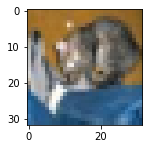

In [37]:
plot_images_labels_prediction(Xtest,Ytest,prediction_result,0,10)